In [1]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from astropy.convolution import Box2DKernel, convolve
#import xskillscore as xs
from filter import filtering
from ice import create_icemask, ice_filter
from calculations import concat_data, anomalies, corr, corr_all, seas_corr, concat_jp
from scipy.ndimage import generic_filter

In [2]:
def Data_3D_median(data, time='time'):
    #filters for every time step, need to specify time --> 'month', 'time'
    res=[]
    for date in data[time]:
        conv=median_filter(data.sel(time=date), size=30)
        res.append(conv)
    da_res=xr.concat(res, dim=time)
    return da_res
   

def median_filter(data, size=30):
    area= xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/ocean_grid.nc').area_t
    data=data*area
    filtered_data = generic_filter(data, np.nanmedian, size=size, mode="wrap")
    filtered_data = filtered_data/area
    filtered_data = data.copy(data=filtered_data)
    return filtered_data

def filtering_median(ds):
    ds_ano=[]
    for var in list(ds.keys()):
        ano=Data_3D_median(ds[var])
        ds_ano.append(ano)
    ds_ano=xr.merge(ds_ano)
    return ds_ano

In [3]:
ds=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/MOM5_control_monthly_0181-0190_noice_all.nc')

In [4]:
test=ds.SST.isel(time=5)

In [5]:
filtered=median_filter(test)

In [6]:
###and npw without the weighting:
filtered2=generic_filter(test, np.nanmedian, size=30, mode="wrap")
filtered2=test.copy(data=filtered2)

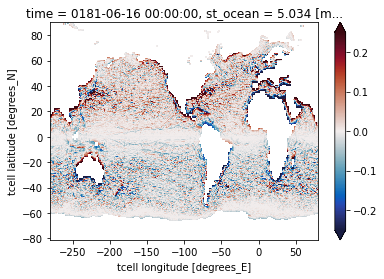

In [7]:
plt.plot(figsize=(16,4))
(filtered-filtered2).plot(vmin=-0.25, vmax=0.25, cmap=cmo.balance)

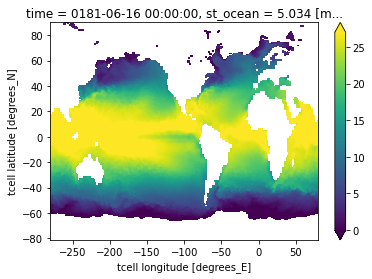

In [8]:
filtered.plot(vmin=0, vmax=27)

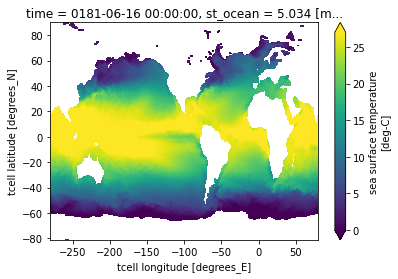

In [9]:
filtered2.plot(vmin=0, vmax=27)

In [10]:
meanfilter=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/3x3box_monthly_0181-0190.nc')

In [11]:
blabla=meanfilter.SST

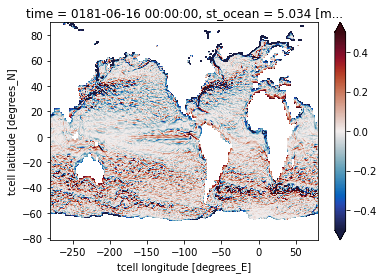

In [12]:
(blabla.isel(time=5)-filtered).plot(vmin=-.5, vmax=.5, cmap=cmo.balance)

In [49]:
### just filter testwise

In [50]:
ds=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/MOM5_control_monthly_0181-0190_noice_all.nc')
dscc=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/MOM5_1PctTo2X_monthly_0181-0190_noice_all.nc')

save='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/3x3box_median_monthly_0181-0190_noice.nc'
savecc='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/3x3box_median_monthly_1PctTo2X_0181-0190_noice.nc'

In [ ]:
ds_ano_cc=filtering_median(dscc)
ds_ano_cc.to_netcdf(savecc)

ds_ano=filtering_median(ds)
ds_ano.to_netcdf(save)